# Benchmarking
This is a first stab at making benchmarks from Python instead of shell/gnuplot, which is the method that has been used until now.
It may make sense to add code for generating new benchmark numbers, e.g. using one of the methods
[listed in this stackoverflow article](https://stackoverflow.com/questions/3652554/calling-java-from-python), or anything else really

The main motivation behind revamping the test setup is not really to use python, but to uncover more information about the
actual performance.  For instance, it seems like the regex matcher at present has an 18% disadvantage wrs to java matching.
However, that is based on the "unfair test", which is deliberately unfair, giving java a good chance to outperform rmatch.

Also the the test runs are short, and there may be benefit in running more extensive tests, both with respect to
length of input and with respect to number of regular expressions.  The complexity of the expressions should also be
variable.

However, the idea of benchmarking towards the java regex library is still a good one, and one that the revamped test regime should
build on.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TODO: Maybe fix the date formatting using [this trick](https://stackoverflow.com/questions/23294197/plotting-chart-with-epoch-time-x-axis-using-matplotlib).

In [2]:
df0 = pd.read_csv('rmatch-tester/measurements/handle-the-wuthering-heights-corpus.csv')
df1 = df0.tail(5)

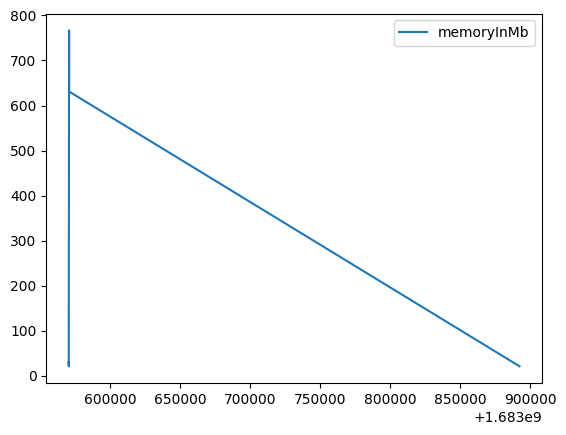

In [3]:
plt.plot(df1["secondsSinceEpoch"], df1["memoryInMb"], label="memoryInMb")
plt.legend()
plt.show()

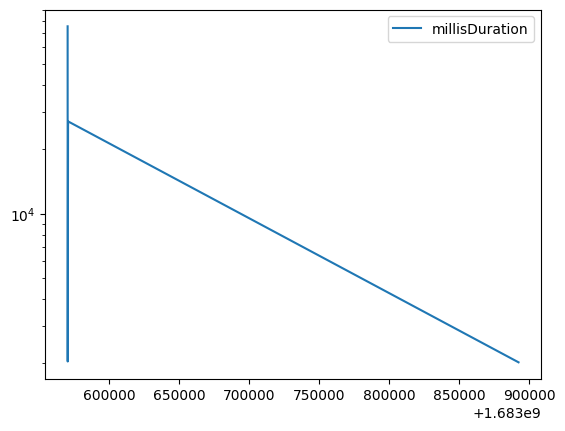

In [4]:
plt.plot(df1["secondsSinceEpoch"], df1["millisDuration"], label="millisDuration")
plt.yscale("log")
plt.legend()
plt.show()

In [5]:
df = pd.read_csv('rmatch-tester/logs/logfile-2023-05-08-20:37:45.csv')

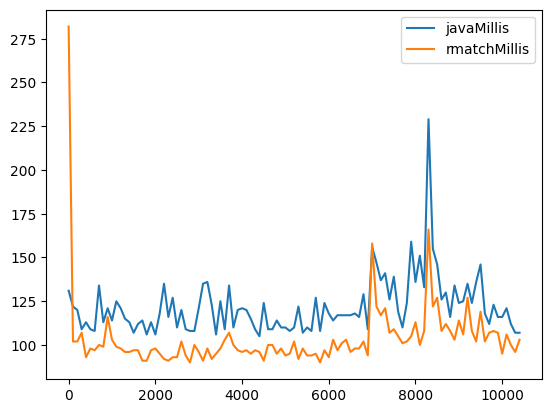

In [6]:
plt.plot(df["NoOfRegexps"], df[" javaMillis"], label="javaMillis")
plt.plot(df["NoOfRegexps"], df[" regexMillis"], label="rmatchMillis")
plt.legend()
plt.show()

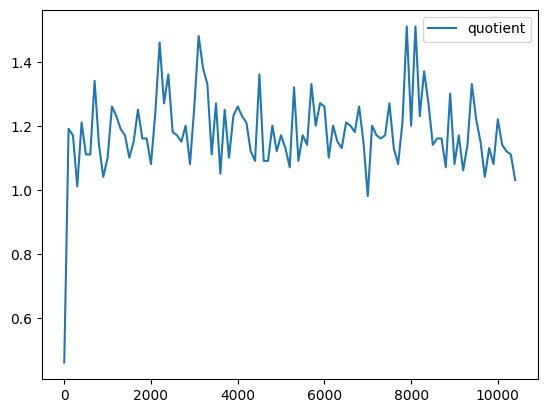

In [7]:
plt.plot(df["NoOfRegexps"], df[" quotient"], label="quotient")
plt.legend()
plt.show()

In [8]:
df[" quotient"].std()

0.12511474586834134

In [9]:
df[" quotient"].mean()

1.181047619047619

In [10]:
df[" javaMillis"].std()

16.22013739593032

In [11]:
df[" javaMillis"].mean()

121.65714285714286

In [12]:
df[" regexMillis"].std()

21.037869221761536

In [13]:
df[" regexMillis"].mean()

103.81904761904762

# Study the large corpus test and evolution over time

In [14]:
largeCorpusDf = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')

In [15]:
largeCorpusDf


,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1685391146229,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,779,166635,java,534,11864,1144409,8,19566,1154369,14.045431
87,1685391363259,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,672,202999,java,534,11054,1144409,8,19566,1154369,18.364302
88,1685391510859,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,847,133541,java,533,11061,1144409,8,19566,1154369,12.073140
89,1685391649968,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1491,126317,java,534,9878,1144409,8,19566,1154369,12.787710


In [16]:
largeCorpusDf["regexPerMilli1"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis1"]
largeCorpusDf["regexPerMilli2"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis2"]
largeCorpusDf["regex2to1ratio"] = largeCorpusDf["regexPerMilli2"] /   largeCorpusDf["regexPerMilli1"]



In [17]:
largeCorpusDf

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000,3.041542e+08,3.481048e+09,11.445013
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000,2.055717e+08,3.629573e+09,17.656000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000,3.264788e+08,3.877749e+09,11.877493
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000,6.822848e+07,7.964248e+08,11.672908
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000,1.423734e+08,1.432726e+09,10.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1685391146229,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,779,166635,java,534,11864,1144409,8,19566,1154369,14.045431,1.355441e+05,1.903775e+06,14.045432
87,1685391363259,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,672,202999,java,534,11054,1144409,8,19566,1154369,18.364302,1.112635e+05,2.043277e+06,18.364303
88,1685391510859,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,847,133541,java,533,11061,1144409,8,19566,1154369,12.073140,1.691345e+05,2.041984e+06,12.073140
89,1685391649968,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1491,126317,java,534,9878,1144409,8,19566,1154369,12.787710,1.788072e+05,2.286534e+06,12.787710


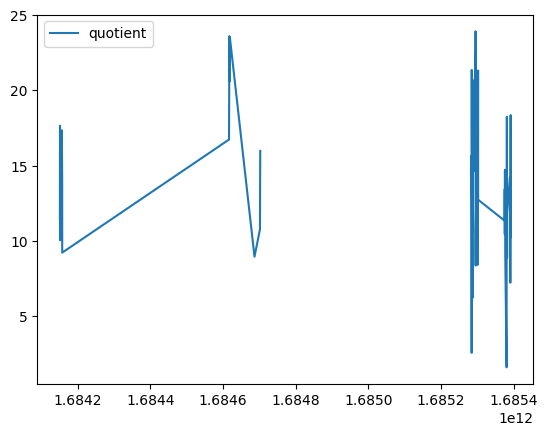

In [18]:
plt.plot(largeCorpusDf["timestamp"], largeCorpusDf["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

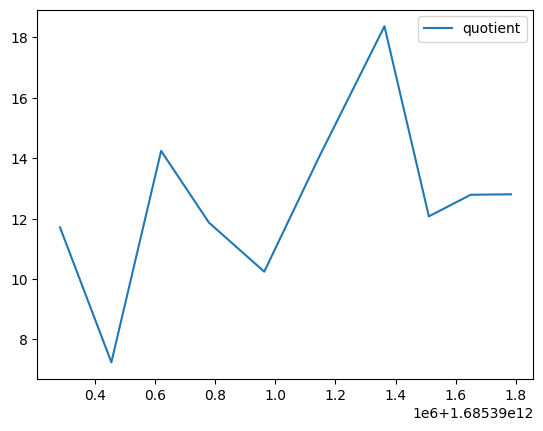

In [19]:
lastTen = largeCorpusDf.iloc[-10:]
plt.plot(lastTen["timestamp"], lastTen["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

In [20]:

lastTen

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
81,1685390284561,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1887,72052,java,534,6154,1144409,8,19566,1154369,11.708158,313473.378310,3.670196e+06,11.708157
82,1685390455297,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,2259,145991,java,534,20161,1144409,8,19566,1154369,7.241258,154710.796241,1.120301e+06,7.241258
83,1685390620659,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1214,150403,java,535,10562,1144409,8,19566,1154369,14.240011,150172.429100,2.138457e+06,14.240011
84,1685390779918,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,794,143498,java,535,12096,1144409,8,19566,1154369,11.863260,157398.596872,1.867261e+06,11.863261
85,1685390963655,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1467,163203,java,531,15935,1144409,8,19566,1154369,10.241795,138394.415875,1.417407e+06,10.241795
86,1685391146229,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,779,166635,java,534,11864,1144409,8,19566,1154369,14.045431,135544.056495,1.903775e+06,14.045432
87,1685391363259,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,672,202999,java,534,11054,1144409,8,19566,1154369,18.364302,111263.522746,2.043277e+06,18.364303
88,1685391510859,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,847,133541,java,533,11061,1144409,8,19566,1154369,12.073140,169134.451996,2.041984e+06,12.073140
89,1685391649968,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1491,126317,java,534,9878,1144409,8,19566,1154369,12.787710,178807.158609,2.286534e+06,12.787710
90,1685391783702,58C63D2D-F066-415C-AE24-E045B873D387,u/la3lma/refactoring-a-la-chatgpt2,rmatch,2182,121319,java,533,9476,1144409,8,19566,1154369,12.802765,186173.508305,2.383536e+06,12.802765


In [21]:
import sqlite3

In [22]:


df = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')
print(df)


        timestamp                          testSeriesId   
0   1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7  \
1   1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   
2   1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   
3   1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   
4   1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   
..            ...                                   ...   
86  1685391146229  58C63D2D-F066-415C-AE24-E045B873D387   
87  1685391363259  58C63D2D-F066-415C-AE24-E045B873D387   
88  1685391510859  58C63D2D-F066-415C-AE24-E045B873D387   
89  1685391649968  58C63D2D-F066-415C-AE24-E045B873D387   
90  1685391783702  58C63D2D-F066-415C-AE24-E045B873D387   

                              metadata matcherTypeName1  usedMemoryInMb1   
0                               master           rmatch              917  \
1                               master           rmatch              599   
2                               master           rmatch        

In [23]:
import os
dbfile = 'measurements.sqlite'
if os.path.exists(dbfile):
    os.remove(dbfile)


In [24]:

table_name = 'Measurements'

query = f'Create table if not Exists {table_name} (timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,"2to1Ratio")'


In [25]:
conn = sqlite3.connect(dbfile)
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

In [26]:
conn = sqlite3.connect(dbfile)
r_df = pd.read_sql("select * from Measurements",conn)
print(r_df)

        timestamp                          testSeriesId   
0   1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7  \
1   1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   
2   1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   
3   1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   
4   1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   
..            ...                                   ...   
86  1685391146229  58C63D2D-F066-415C-AE24-E045B873D387   
87  1685391363259  58C63D2D-F066-415C-AE24-E045B873D387   
88  1685391510859  58C63D2D-F066-415C-AE24-E045B873D387   
89  1685391649968  58C63D2D-F066-415C-AE24-E045B873D387   
90  1685391783702  58C63D2D-F066-415C-AE24-E045B873D387   

                              metadata matcherTypeName1  usedMemoryInMb1   
0                               master           rmatch              917  \
1                               master           rmatch              599   
2                               master           rmatch        

In [27]:
with open('summarize-large-corpus-trials.sql', 'r') as file:
    summarizerSql = file.read().rstrip()


In [28]:
summarizerSql

"select min(timestamp) as timestamp,\n       testSeriesId,\n       metadata,\n       noOfMatches,\n       noOfMismatches,\n       corpusLength,\n       noOfRegexps,\n       min(durationInMillis2) as 'minJavaDuration',\n       max(durationInMillis2) as 'maxJavaDuration',\n       avg(durationInMillis2) as 'avgJavaDuration',\n       min(durationInMillis1) as 'minRegexDuration',\n       max(durationInMillis1) as 'maxRegexDuration',\n       avg(durationInMillis1) as 'avgRegexDuration',\n--       stdev(durationInMillis2) as 'stdevJavaDuration',\n--       stdev(durationInMillis1) as 'stdevRegexDuration',\n       ((1.0*min(durationInMillis1))/(1.0*min(durationInMillis2))) as 'minMinRatio',\n       ((1.0*max(durationInMillis1))/(1.0*max(durationInMillis2))) as 'maxMaxRatio',\n       ((1.0*avg(durationInMillis1))/(1.0*avg(durationInMillis2))) as 'avgAvgRatio'\n--       ((1.0*stdev(durationInMillis1))/(1.0*stdev(durationInMillis2))) as 'stdevStdevRatio'\nfrom Measurements  where timestamp >= 1685

In [29]:

conn = sqlite3.connect(dbfile)
r_df = pd.read_sql(summarizerSql, conn)

print(r_df)
conn.close()


       timestamp                          testSeriesId   
0  1685294890722  9944A73D-6097-402F-BF49-9105CBF968A8  \
1  1685294914249  509618D3-F94B-408F-AC94-CC26EA98DE4C   
2  1685294953205  8134D22C-6402-4AAC-A082-199CA4BCF01E   
3  1685295100391  6DE05017-510E-496A-BE45-2778F03E0D4F   
4  1685300128023  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
5  1685374976474  8383FDD9-A509-4046-8F04-FD430BB07BA8   
6  1685380210149  28CC3751-BA44-4B0D-BA81-27F159A3079C   
7  1685390284561  58C63D2D-F066-415C-AE24-E045B873D387   

                             metadata  noOfMatches  noOfMismatches   
0  u/la3lma/refactoring-a-la-chatgpt2           23               0  \
1  u/la3lma/refactoring-a-la-chatgpt2         6467               0   
2  u/la3lma/refactoring-a-la-chatgpt2        96068               0   
3  u/la3lma/refactoring-a-la-chatgpt2       576005               0   
4  u/la3lma/refactoring-a-la-chatgpt2      1144409               8   
5                              master      1144409       

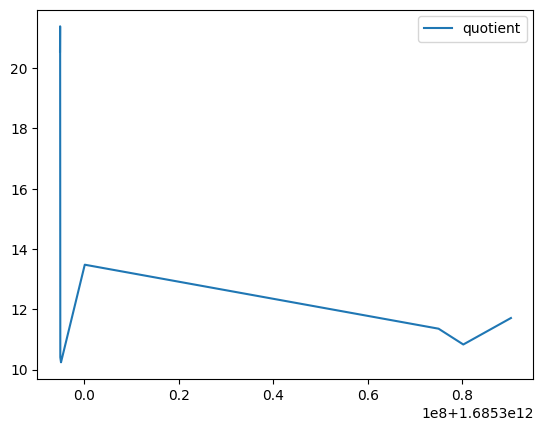

In [30]:
lastTen = r_df.iloc[-100:]
plt.plot(r_df["timestamp"], lastTen["minMinRatio"], label="quotient")
plt.legend()
plt.show()